In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import scipy
import scipy.stats

In [2]:
b=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv") #import dataset
# 1 Import a 311 NYC service request.
a=b

C:\Users\Deepak\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
a.columns 
#column names of data set


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [4]:
a.describe(include='all')

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,3.006980e+05,300698,298534,300698,300698,300698,294784,300567,298083.000000,256288,...,243,243,213,213,0.0,1,2,297158.000000,297158.000000,297158
unique,NaN,259493,237165,1,3,24,45,18,NaN,107652,...,29,34,2,160,NaN,1,2,NaN,NaN,126048
top,NaN,06-06-15 22:23,11-08-15 7:34,NYPD,New York City Police Department,Blocked Driveway,Loud Music/Party,Street/Sidewalk,NaN,1207 BEACH AVENUE,...,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),NaN,Manhattan Bound,Barberi,NaN,NaN,"(40.83036235589997, -73.86602154214397)"
freq,NaN,9,24,300698,300690,77044,61430,249299,NaN,904,...,33,21,162,6,NaN,1,1,NaN,NaN,902
mean,3.130054e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10848.888645,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630,NaN
std,5.738547e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583.182081,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454,NaN
min,3.027948e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937,NaN
25%,3.080118e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10310.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142,NaN
50%,3.130436e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11208.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781,NaN
75%,3.178446e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11238.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805,NaN


In [5]:
print(a.dtypes) 
#data types

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [6]:
print(a["Created Date"]) 
#created date formats

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
5         12/31/2015 11:56:30 PM
6         12/31/2015 11:55:32 PM
7         12/31/2015 11:54:05 PM
8         12/31/2015 11:53:58 PM
9         12/31/2015 11:53:58 PM
10        12/31/2015 11:52:58 PM
11        12/31/2015 11:50:57 PM
12        12/31/2015 11:48:03 PM
13        12/31/2015 11:47:58 PM
14        12/31/2015 11:47:37 PM
15        12/31/2015 11:47:30 PM
16        12/31/2015 11:47:02 PM
17        12/31/2015 11:44:52 PM
18        12/31/2015 11:40:59 PM
19        12/31/2015 11:40:55 PM
20        12/31/2015 11:40:43 PM
21        12/31/2015 11:38:51 PM
22        12/31/2015 11:34:18 PM
23        12/31/2015 11:32:46 PM
24        12/31/2015 11:31:40 PM
25        12/31/2015 11:30:28 PM
26        12/31/2015 11:26:41 PM
27        12/31/2015 11:26:35 PM
28        12/31/2015 11:25:56 PM
29        12/31/2015 11:25:01 PM
          

In [7]:
print(a["Closed Date"]) 
# check closed date formats

0                  01-01-16 0:55
1                  01-01-16 1:26
2                  01-01-16 4:51
3                  01-01-16 7:43
4                  01-01-16 3:24
5                  01-01-16 1:50
6                  01-01-16 1:53
7                  01-01-16 1:42
8                  01-01-16 8:27
9                  01-01-16 1:17
10                 01-01-16 7:41
11                01-01-16 10:58
12                 01-01-16 2:17
13                 01-01-16 8:18
14                01-01-16 10:17
15                01-01-16 15:20
16                 01-01-16 4:39
17                 01-01-16 0:36
18                 01-01-16 2:37
19                 01-01-16 0:28
20                 01-01-16 4:12
21                 01-01-16 9:11
22                 01-01-16 0:50
23                 01-01-16 0:25
24                01-03-16 16:22
25                 01-01-16 2:47
26        12/31/2015 11:53:31 PM
27                 01-01-16 5:07
28                 01-01-16 1:12
29                 01-01-16 1:55
          

In [8]:
import datetime as dt #import datetime

In [9]:
a.columns=a.columns.str.replace(' ','') 
#remove spaces from columns for ease
a.columns

Index(['UniqueKey', 'CreatedDate', 'ClosedDate', 'Agency', 'AgencyName',
       'ComplaintType', 'Descriptor', 'LocationType', 'IncidentZip',
       'IncidentAddress', 'StreetName', 'CrossStreet1', 'CrossStreet2',
       'IntersectionStreet1', 'IntersectionStreet2', 'AddressType', 'City',
       'Landmark', 'FacilityType', 'Status', 'DueDate',
       'ResolutionDescription', 'ResolutionActionUpdatedDate',
       'CommunityBoard', 'Borough', 'XCoordinate(StatePlane)',
       'YCoordinate(StatePlane)', 'ParkFacilityName', 'ParkBorough',
       'SchoolName', 'SchoolNumber', 'SchoolRegion', 'SchoolCode',
       'SchoolPhoneNumber', 'SchoolAddress', 'SchoolCity', 'SchoolState',
       'SchoolZip', 'SchoolNotFound', 'SchoolorCitywideComplaint',
       'VehicleType', 'TaxiCompanyBorough', 'TaxiPickUpLocation',
       'BridgeHighwayName', 'BridgeHighwayDirection', 'RoadRamp',
       'BridgeHighwaySegment', 'GarageLotName', 'FerryDirection',
       'FerryTerminalName', 'Latitude', 'Longitude', 

In [10]:
closed=a["ClosedDate"]
# if closed date is nan fill nan else check if the 
#string contains - use the 
#mm-dd-yy h:m format with 24 hours
# else use mm/dd/yy h:m am/pm format
#convert into datetime object 
#and replace with closeddate coluumn
a.ClosedDate=a.ClosedDate.apply(lambda row: np.nan if type(row)==type(0.0)\
else(dt.datetime.strptime(row,"%m-%d-%y %H:%M") if '-' \
in row else dt.datetime.strptime(row,"%m/%d/%Y %I:%M:%S %p")))
print("\nn\n\n\nnnnnnnn")
a


n


nnnnnnn


,UniqueKey,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,...,BridgeHighwayName,BridgeHighwayDirection,RoadRamp,BridgeHighwaySegment,GarageLotName,FerryDirection,FerryTerminalName,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,2016-01-01 01:53:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,2016-01-01 01:42:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,2016-01-01 08:27:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [11]:
a.CreatedDate=a.CreatedDate.apply(lambda x: \
dt.datetime.strptime(x,"%m-%d-%y %H:%M") \
if '-' in x \
else(null if len(x)==0 \
else dt.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p")))
#created date can not be nan
#use mm-dd-yy h:m if strin contains - else uuse mm/dd/yy h:m am/pm
a.CreatedDate

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
5        2015-12-31 23:56:30
6        2015-12-31 23:55:32
7        2015-12-31 23:54:05
8        2015-12-31 23:53:58
9        2015-12-31 23:53:58
10       2015-12-31 23:52:58
11       2015-12-31 23:50:57
12       2015-12-31 23:48:03
13       2015-12-31 23:47:58
14       2015-12-31 23:47:37
15       2015-12-31 23:47:30
16       2015-12-31 23:47:02
17       2015-12-31 23:44:52
18       2015-12-31 23:40:59
19       2015-12-31 23:40:55
20       2015-12-31 23:40:43
21       2015-12-31 23:38:51
22       2015-12-31 23:34:18
23       2015-12-31 23:32:46
24       2015-12-31 23:31:40
25       2015-12-31 23:30:28
26       2015-12-31 23:26:41
27       2015-12-31 23:26:35
28       2015-12-31 23:25:56
29       2015-12-31 23:25:01
                 ...        
300668   2015-03-29 01:03:20
300669   2015-03-29 01:02:05
300670   2015-03-29 01:01:25
300671   2015-

In [12]:
#Calculate difference in seconds using 
#datetime diff and save in new column
#if closeddate is nan fill 
#this new column row value with nan
a["Request_Closing_Time"]=a.apply(lambda row:\
(row.ClosedDate-row.CreatedDate).total_seconds()\
if pd.notnull(row["ClosedDate"]) else np.nan,axis=1)
#a.ClosedDate.describe()
a["Request_Closing_Time"]
#2 Read or convert the columns 
#‘Created Date’ and Closed Date’ to datetime datatype 
#and create a new column ‘Request_Closing_Time’ as the 
#time elapsed between request creation and request closing.
#(Hint: Explore the package/module datetime)

0           3315.0
1           5176.0
2          17491.0
3          27914.0
4          12422.0
5           6810.0
6           7048.0
7           6475.0
8          30782.0
9           4982.0
10         28082.0
11         40023.0
12          8937.0
13         30602.0
14         37763.0
15         55950.0
16         17518.0
17          3068.0
18         10561.0
19          2825.0
20         16277.0
21         34329.0
22          4542.0
23          3134.0
24        233420.0
25         11792.0
26          1610.0
27         20425.0
28          6364.0
29          8999.0
            ...   
300668      9419.0
300669     15873.0
300670     30327.0
300671     13554.0
300672     56546.0
300673      5286.0
300674      8440.0
300675      3690.0
300676     25951.0
300677     22626.0
300678     22577.0
300679      4350.0
300680     12986.0
300681     10450.0
300682     23154.0
300683     10544.0
300684      1655.0
300685     13354.0
300686       857.0
300687      8093.0
300688      1524.0
300689     1

In [13]:
import matplotlib as mp
import matplotlib.pyplot as plt

In [14]:
print(a.City.unique()) #print city names


['NEW YORK' 'ASTORIA' 'BRONX' 'ELMHURST' 'BROOKLYN' 'KEW GARDENS'
 'JACKSON HEIGHTS' 'MIDDLE VILLAGE' 'REGO PARK' 'SAINT ALBANS' 'JAMAICA'
 'SOUTH RICHMOND HILL' nan 'RIDGEWOOD' 'HOWARD BEACH' 'FOREST HILLS'
 'STATEN ISLAND' 'OZONE PARK' 'RICHMOND HILL' 'WOODHAVEN' 'FLUSHING'
 'CORONA' 'QUEENS VILLAGE' 'OAKLAND GARDENS' 'HOLLIS' 'MASPETH'
 'EAST ELMHURST' 'SOUTH OZONE PARK' 'WOODSIDE' 'FRESH MEADOWS'
 'LONG ISLAND CITY' 'ROCKAWAY PARK' 'SPRINGFIELD GARDENS' 'COLLEGE POINT'
 'BAYSIDE' 'GLEN OAKS' 'FAR ROCKAWAY' 'BELLEROSE' 'LITTLE NECK'
 'CAMBRIA HEIGHTS' 'ROSEDALE' 'SUNNYSIDE' 'WHITESTONE' 'ARVERNE'
 'FLORAL PARK' 'NEW HYDE PARK' 'CENTRAL PARK' 'BREEZY POINT' 'QUEENS'
 'Astoria' 'Long Island City' 'Woodside' 'East Elmhurst' 'Howard Beach']


In [15]:
b=a #make a copy
b.dropna(subset=['City'],inplace=True) 
#drop rows with nan city
b.City=b.City.str.upper() 
#convert all to same case
print(b.City.unique()) 
#print city names again duuplicates are merged now


['NEW YORK' 'ASTORIA' 'BRONX' 'ELMHURST' 'BROOKLYN' 'KEW GARDENS'
 'JACKSON HEIGHTS' 'MIDDLE VILLAGE' 'REGO PARK' 'SAINT ALBANS' 'JAMAICA'
 'SOUTH RICHMOND HILL' 'RIDGEWOOD' 'HOWARD BEACH' 'FOREST HILLS'
 'STATEN ISLAND' 'OZONE PARK' 'RICHMOND HILL' 'WOODHAVEN' 'FLUSHING'
 'CORONA' 'QUEENS VILLAGE' 'OAKLAND GARDENS' 'HOLLIS' 'MASPETH'
 'EAST ELMHURST' 'SOUTH OZONE PARK' 'WOODSIDE' 'FRESH MEADOWS'
 'LONG ISLAND CITY' 'ROCKAWAY PARK' 'SPRINGFIELD GARDENS' 'COLLEGE POINT'
 'BAYSIDE' 'GLEN OAKS' 'FAR ROCKAWAY' 'BELLEROSE' 'LITTLE NECK'
 'CAMBRIA HEIGHTS' 'ROSEDALE' 'SUNNYSIDE' 'WHITESTONE' 'ARVERNE'
 'FLORAL PARK' 'NEW HYDE PARK' 'CENTRAL PARK' 'BREEZY POINT' 'QUEENS']


In [16]:
print(b.City.value_counts()) 
#check value counts


BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 7047
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3664
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2748
ELMHURST                2673
LONG ISLAND CITY        2571
WOODHAVEN               2464
MASPETH                 2462
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             932
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

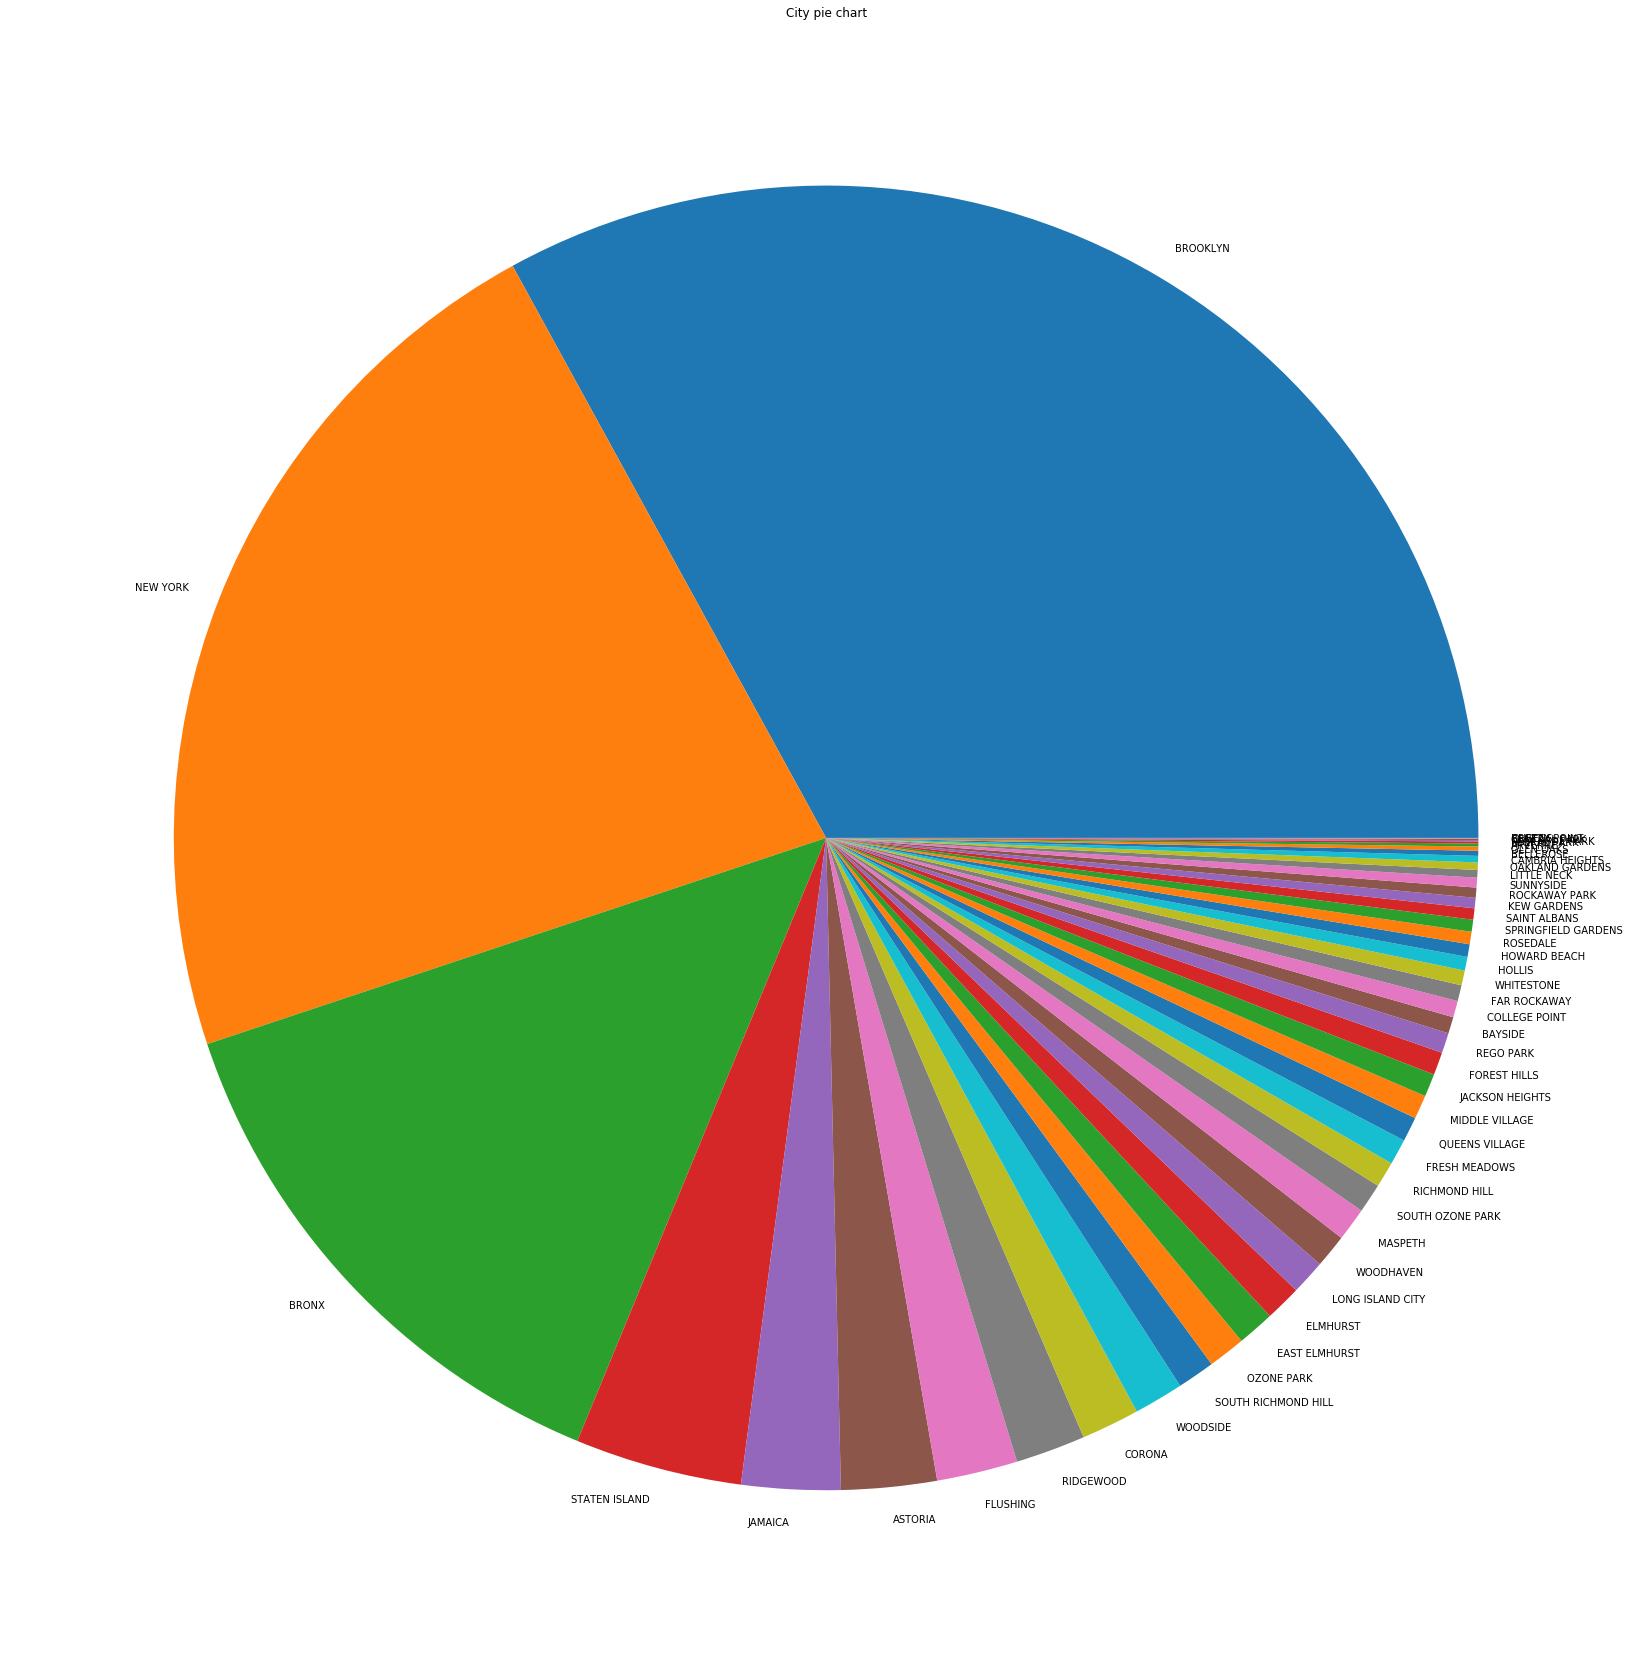

In [17]:
fig = plt.figure(figsize=[30, 30])
ax = fig.add_subplot(111)

cmap = plt.cm.prism
#colors = cmap(np.linspace(0., 1., len(b.City.value_counts().index)))

labels =list(b.City.value_counts().index)

ax.pie(b.City.value_counts(),\
labels=labels, labeldistance=1.05)
ax.set_title("City pie chart");

In [18]:
from matplotlib.ticker import PercentFormatter


def _plot_pareto_by(df_, group_by, column):

    df = df_.groupby(group_by)[column].sum().reset_index()
    df = df.sort_values(by=column,ascending=False)

    df["cumpercentage"] = df[column].cumsum()/df[column].sum()*100


    fig, ax = plt.subplots(figsize=(20,5))
    ax.bar(df[group_by], df[column], color="C0")
    ax2 = ax.twinx()
    ax2.plot(df[group_by], df["cumpercentage"], color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    plt.show()


             values
count     48.000000
mean    6210.083333
std    17419.756849
min       30.000000
25%      739.500000
50%     1587.000000
75%     2749.750000
max    98307.000000


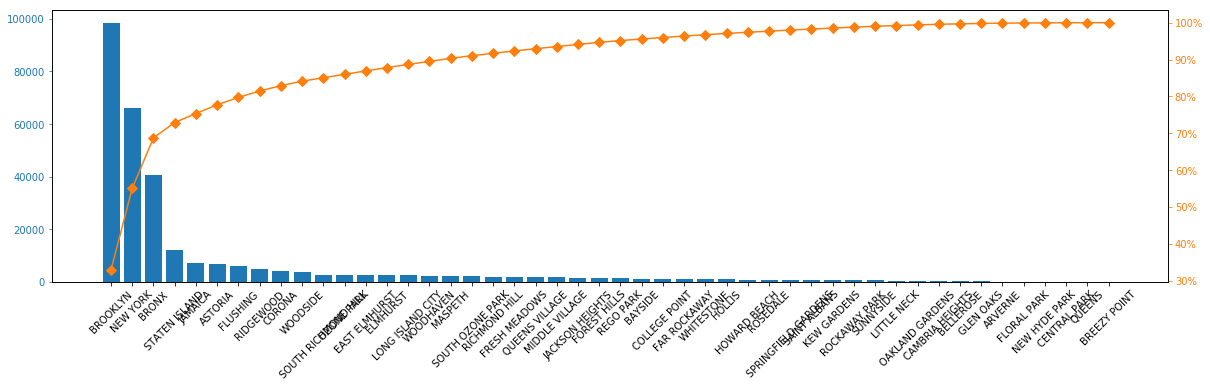

In [19]:
#ax.pie(b.City.value_counts(), labels=labels, labeldistance=1.05)
df_city=pd.DataFrame({'labels':labels, 'values':b.City.value_counts()})
print(df_city.describe())
_plot_pareto_by(df_city,'labels','values')


#inference 1
# Brooklyn, New york, BBronx, staten island and 
#jamaica combined contribute to around 80% of complaints
# 1 these cities might need appropriate 
#awareness programs to reduce the behaviours causing complaints
# 2 caution: the values are not 
#adjusted based on population / population 
#density which is a hidden variable
# 3 this might also mean causality 
#on other way meaning people 
#are not aware of 311 service in the other areas/cities

In [20]:
print(a.ComplaintType.unique()) 
#print complaint types

['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Bike/Roller/Skate Chronic' 'Panhandling'
 'Noise - Park' 'Homeless Encampment' 'Urinating in Public' 'Graffiti'
 'Disorderly Youth' 'Illegal Fireworks' 'Squeegee' 'Animal in a Park']


In [21]:
b=a
b.dropna(subset=['ComplaintType'],inplace=True) 
#drop na
b.ComplaintType=b.ComplaintType.str.upper() 
#make in upper case to makes sure no duplicates happen
print(b.ComplaintType.unique()) 
#cross check cateorical variable

['NOISE - STREET/SIDEWALK' 'BLOCKED DRIVEWAY' 'ILLEGAL PARKING'
 'DERELICT VEHICLE' 'NOISE - COMMERCIAL' 'NOISE - HOUSE OF WORSHIP'
 'POSTING ADVERTISEMENT' 'NOISE - VEHICLE' 'ANIMAL ABUSE' 'VENDING'
 'TRAFFIC' 'DRINKING' 'BIKE/ROLLER/SKATE CHRONIC' 'PANHANDLING'
 'NOISE - PARK' 'HOMELESS ENCAMPMENT' 'URINATING IN PUBLIC' 'GRAFFITI'
 'DISORDERLY YOUTH' 'ILLEGAL FIREWORKS' 'SQUEEGEE' 'ANIMAL IN A PARK']


In [22]:

print(b.ComplaintType.value_counts()) 
#print value counts

BLOCKED DRIVEWAY             76761
ILLEGAL PARKING              74318
NOISE - STREET/SIDEWALK      48000
NOISE - COMMERCIAL           35200
DERELICT VEHICLE             17547
NOISE - VEHICLE              17029
ANIMAL ABUSE                  7767
TRAFFIC                       4495
HOMELESS ENCAMPMENT           4415
NOISE - PARK                  4016
VENDING                       3795
DRINKING                      1272
NOISE - HOUSE OF WORSHIP       929
POSTING ADVERTISEMENT          649
URINATING IN PUBLIC            592
BIKE/ROLLER/SKATE CHRONIC      422
PANHANDLING                    305
DISORDERLY YOUTH               286
ILLEGAL FIREWORKS              168
GRAFFITI                       113
SQUEEGEE                         4
ANIMAL IN A PARK                 1
Name: ComplaintType, dtype: int64


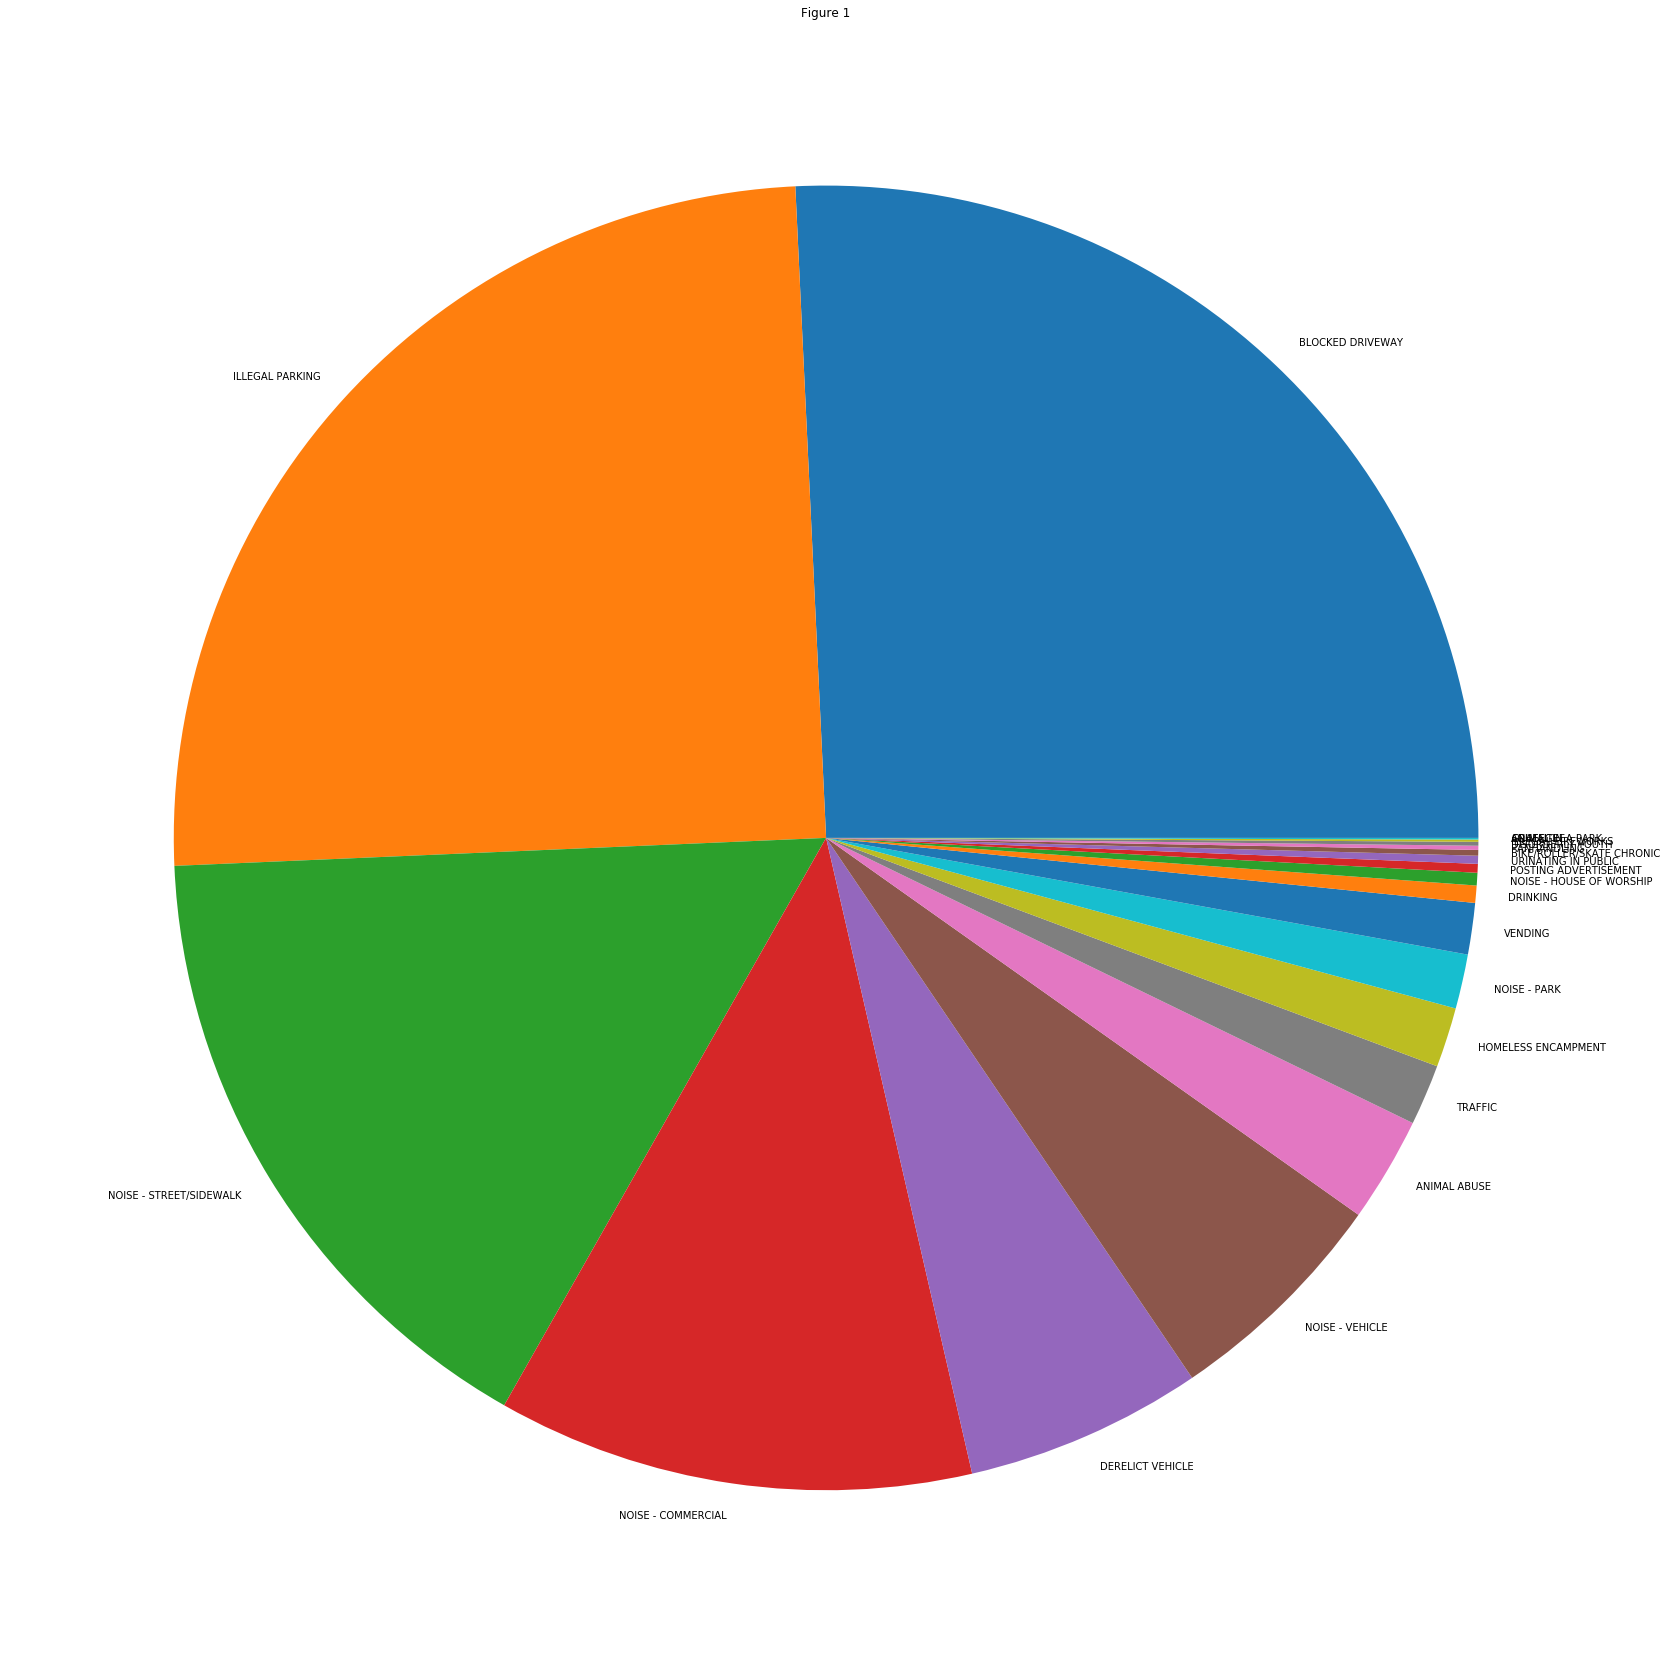

In [23]:
fig = plt.figure(figsize=[30, 30])
ax = fig.add_subplot(111)

cmap = plt.cm.prism

labels =list(b.ComplaintType.value_counts().index)

ax.pie(b.ComplaintType.value_counts(), labels=labels, labeldistance=1.05)
ax.set_title("Figure 1");

             values
count     22.000000
mean   13549.272727
std    23555.122088
min        1.000000
25%      334.250000
50%     2533.500000
75%    14713.500000
max    76761.000000


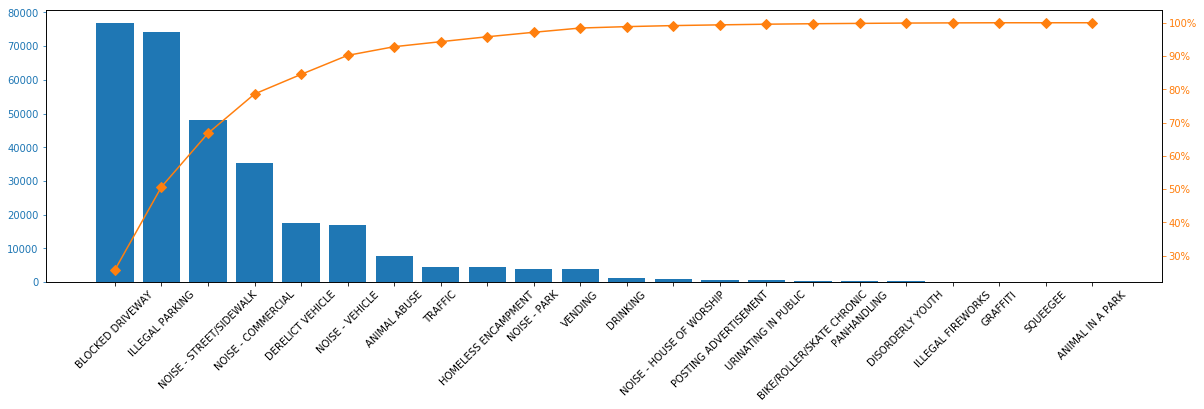

In [24]:

df_comp=pd.DataFrame({'labels':labels, 'values':b.ComplaintType.value_counts()})
print(df_comp.describe())
_plot_pareto_by(df_comp,'labels','values')


#inference 2
# blocked driveway, illegal parking, 
#noise -street/sidewalk ammount to around 80% complaints
#noise - commercial, noise-vehicle, 
#derelict vehicle and animal abuse add upto total 90%
# 1 regulation, enforcement and awareness 
#on guidelines and best practices can be performed to reduce these issues


            labels  values
CLOSED      CLOSED  297965
OPEN          OPEN      65
ASSIGNED  ASSIGNED      52
DRAFT        DRAFT       2


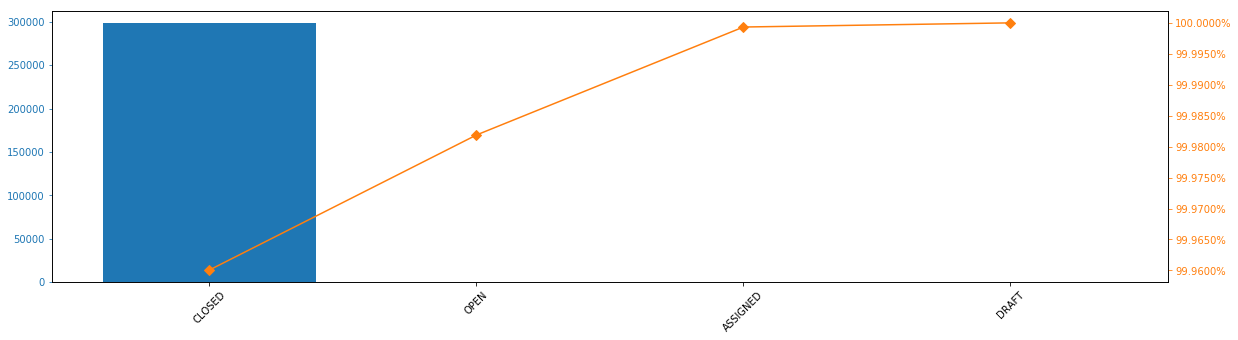

In [25]:
a.Status.unique()
b=a
#b=a[[a['status']]]
b.dropna(subset=['Status'],inplace=True)
b.Status=b.Status.str.upper()



labels =list(b.Status.value_counts().index)

df_comp=pd.DataFrame({'labels':labels, 'values':b.Status.value_counts()})
print(df_comp)
_plot_pareto_by(df_comp,'labels','values')

#inference 3
#majority of complaints are closed by now 99.9% complaints get closed

In [26]:
print(a.ComplaintType.unique())


['NOISE - STREET/SIDEWALK' 'BLOCKED DRIVEWAY' 'ILLEGAL PARKING'
 'DERELICT VEHICLE' 'NOISE - COMMERCIAL' 'NOISE - HOUSE OF WORSHIP'
 'POSTING ADVERTISEMENT' 'NOISE - VEHICLE' 'ANIMAL ABUSE' 'VENDING'
 'TRAFFIC' 'DRINKING' 'BIKE/ROLLER/SKATE CHRONIC' 'PANHANDLING'
 'NOISE - PARK' 'HOMELESS ENCAMPMENT' 'URINATING IN PUBLIC' 'GRAFFITI'
 'DISORDERLY YOUTH' 'ILLEGAL FIREWORKS' 'SQUEEGEE' 'ANIMAL IN A PARK']


In [27]:
b=a.loc[a['Status']!='CLOSED']
b.dropna(subset=['ComplaintType'],inplace=True)
b.ComplaintType=b.ComplaintType.str.upper()
print(b.ComplaintType.unique())

['BLOCKED DRIVEWAY' 'ILLEGAL PARKING' 'NOISE - COMMERCIAL'
 'DERELICT VEHICLE' 'NOISE - STREET/SIDEWALK' 'TRAFFIC' 'NOISE - PARK'
 'POSTING ADVERTISEMENT' 'NOISE - VEHICLE' 'VENDING' 'HOMELESS ENCAMPMENT'
 'ANIMAL ABUSE']


C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Deepak\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


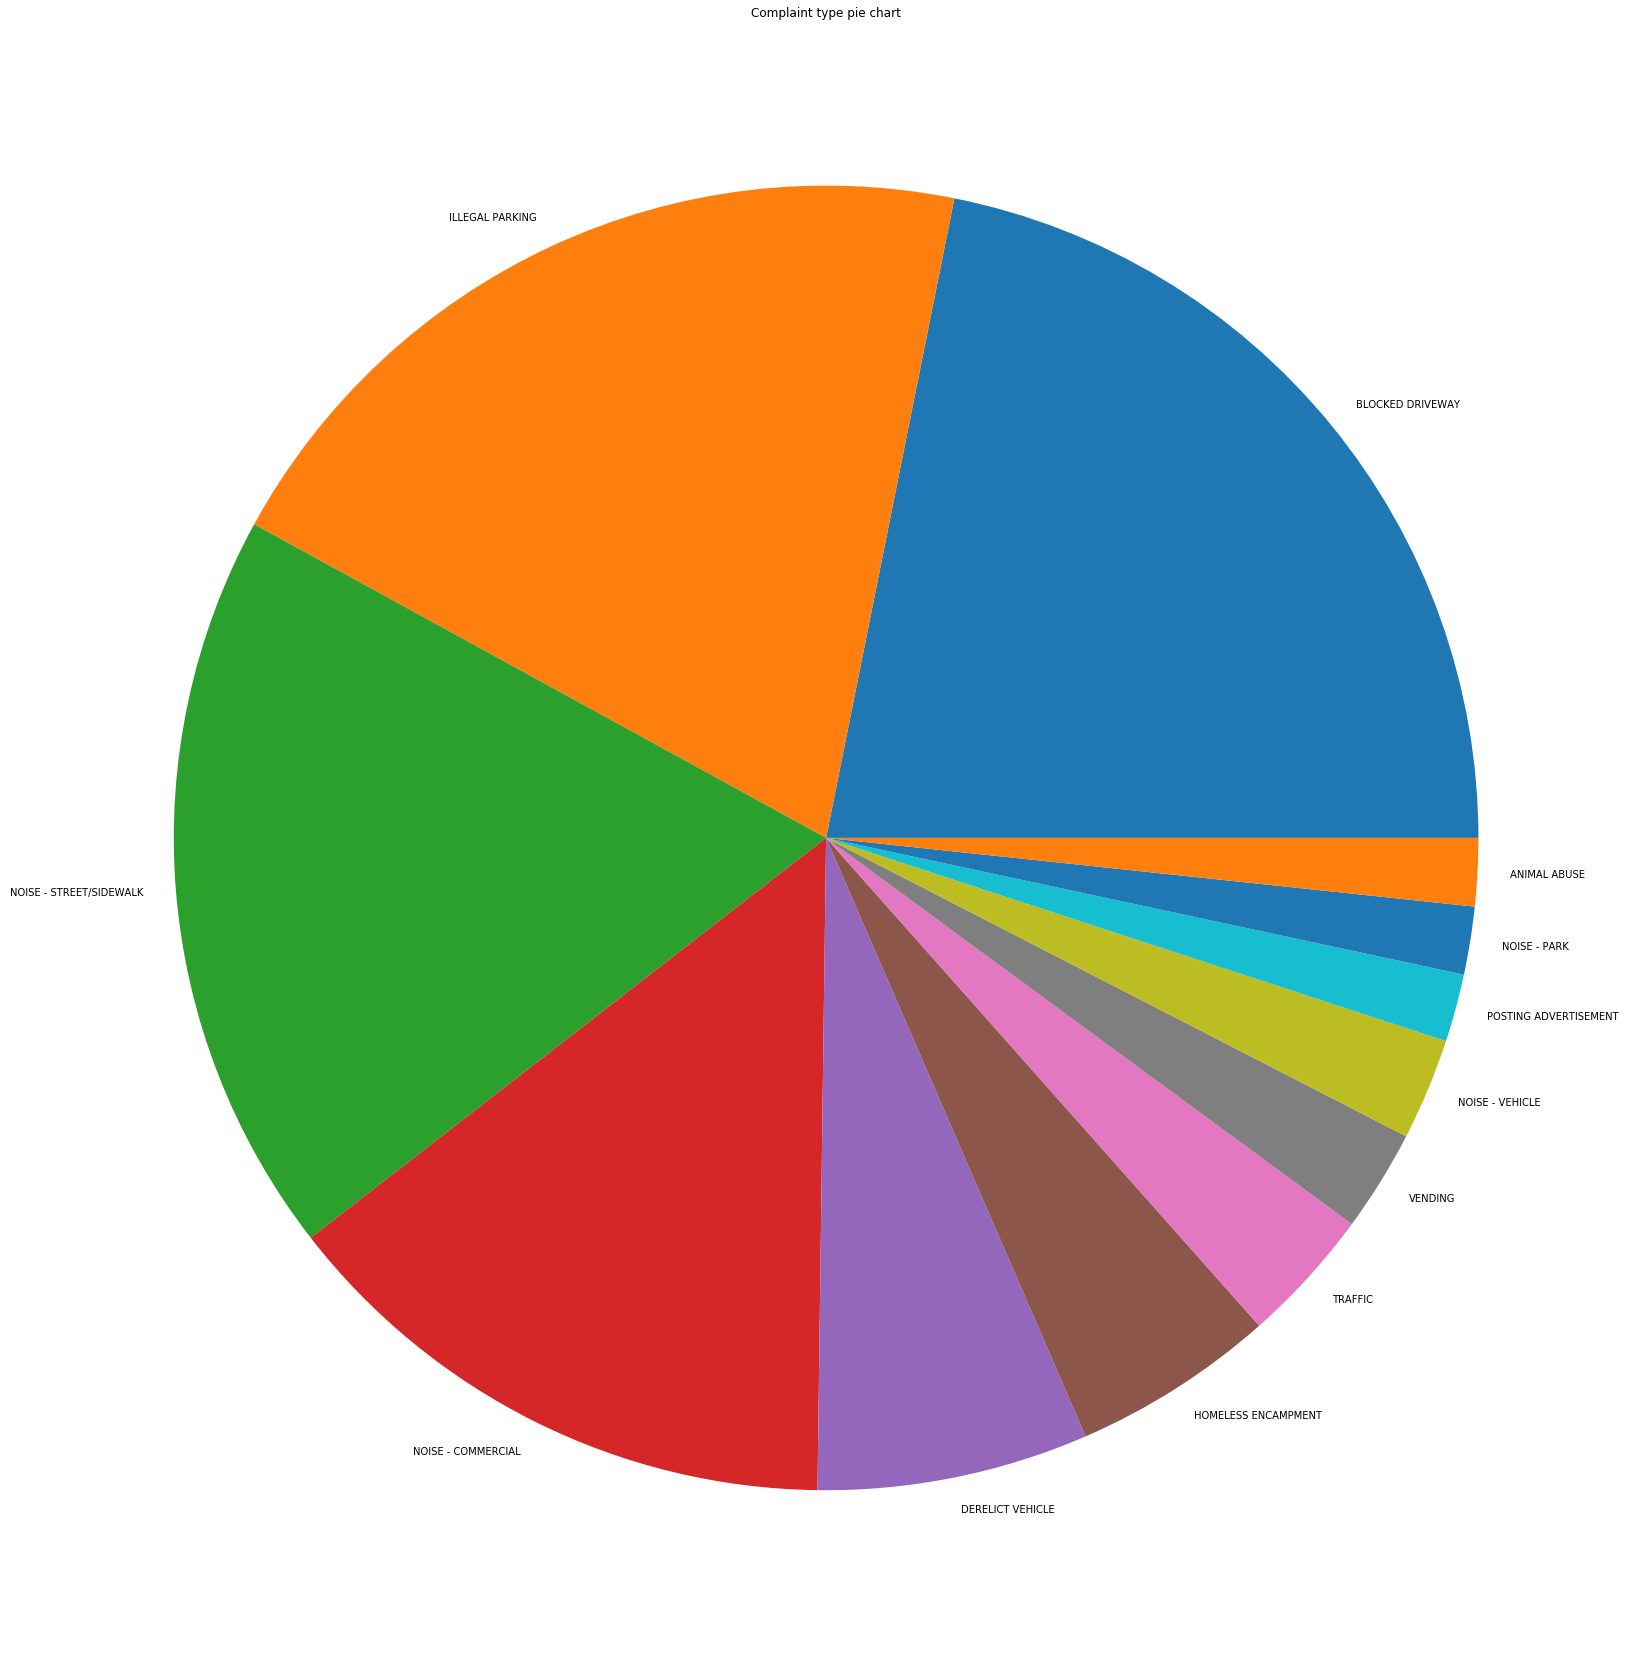

In [28]:



fig = plt.figure(figsize=[30, 30])
ax = fig.add_subplot(111)

cmap = plt.cm.prism

labels =list(b.ComplaintType.value_counts().index)

ax.pie(b.ComplaintType.value_counts(), labels=labels, labeldistance=1.05)
ax.set_title("Complaint type pie chart");


                                          labels  values
BLOCKED DRIVEWAY                BLOCKED DRIVEWAY      26
ILLEGAL PARKING                  ILLEGAL PARKING      24
NOISE - STREET/SIDEWALK  NOISE - STREET/SIDEWALK      22
NOISE - COMMERCIAL            NOISE - COMMERCIAL      17
DERELICT VEHICLE                DERELICT VEHICLE       8
HOMELESS ENCAMPMENT          HOMELESS ENCAMPMENT       6
TRAFFIC                                  TRAFFIC       4
VENDING                                  VENDING       3
NOISE - VEHICLE                  NOISE - VEHICLE       3
POSTING ADVERTISEMENT      POSTING ADVERTISEMENT       2
NOISE - PARK                        NOISE - PARK       2
ANIMAL ABUSE                        ANIMAL ABUSE       2


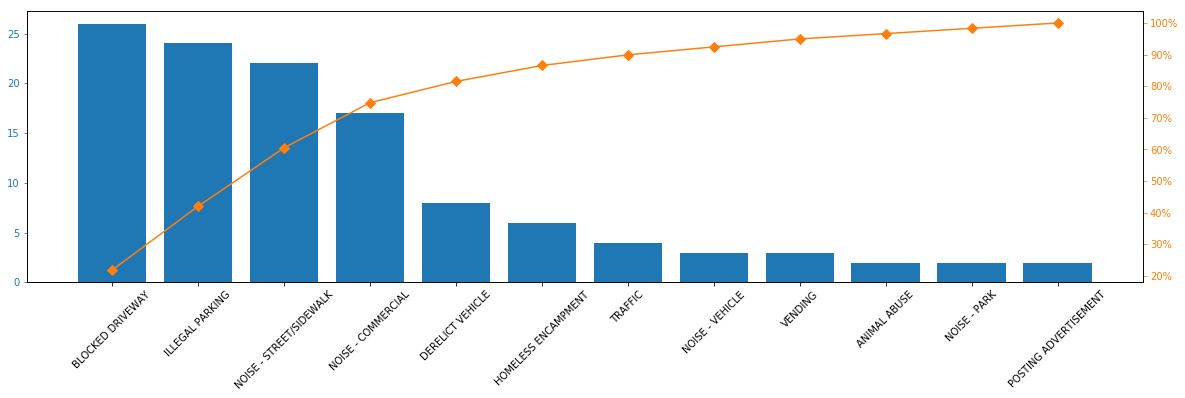

In [29]:


labels =list(b.ComplaintType.value_counts().index)

df_comp=pd.DataFrame({'labels':labels, 'values':b.ComplaintType.value_counts()})
print(df_comp)
_plot_pareto_by(df_comp,'labels','values')


In [30]:
import scipy
import scipy.stats
b=a.loc[a['Status']!='CLOSED']
b.dropna(subset=['ComplaintType'],inplace=True)
b.ComplaintType=b.ComplaintType.str.upper()
print(b.ComplaintType.unique())
print(b.ComplaintType.value_counts())

 

['BLOCKED DRIVEWAY' 'ILLEGAL PARKING' 'NOISE - COMMERCIAL'
 'DERELICT VEHICLE' 'NOISE - STREET/SIDEWALK' 'TRAFFIC' 'NOISE - PARK'
 'POSTING ADVERTISEMENT' 'NOISE - VEHICLE' 'VENDING' 'HOMELESS ENCAMPMENT'
 'ANIMAL ABUSE']
BLOCKED DRIVEWAY           26
ILLEGAL PARKING            24
NOISE - STREET/SIDEWALK    22
NOISE - COMMERCIAL         17
DERELICT VEHICLE            8
HOMELESS ENCAMPMENT         6
TRAFFIC                     4
VENDING                     3
NOISE - VEHICLE             3
POSTING ADVERTISEMENT       2
NOISE - PARK                2
ANIMAL ABUSE                2
Name: ComplaintType, dtype: int64


C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:

stat, p, dof, expected =    scipy.stats.chi2_contingency(pd.crosstab(b.City, b.Status))

alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 
    
 
stat, p, dof, expected =    scipy.stats.chi2_contingency(pd.crosstab(b.ComplaintType, b.Status))

alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 0.8204247422385368
Independent (H0 holds true)
p value is 0.5997330636852322
Independent (H0 holds true)


In [32]:
   
pd.crosstab(b.Status, b.ComplaintType)

#inference 4
# 75% of the complaints that stay open are 
#from Blocked driveway, illegal parking, noise street/sidewalk 
#and noise commercial type
#chi square test however significantly 
#proves that complaint type and status are independent
#similarly city and status are also independent
#cross table shows the data for this

ComplaintType,ANIMAL ABUSE,BLOCKED DRIVEWAY,DERELICT VEHICLE,HOMELESS ENCAMPMENT,ILLEGAL PARKING,NOISE - COMMERCIAL,NOISE - PARK,NOISE - STREET/SIDEWALK,NOISE - VEHICLE,POSTING ADVERTISEMENT,TRAFFIC,VENDING
Status,,,,,,,,,,,,
ASSIGNED,2,17,1,4,9,7,1,6,2,1,1,1
DRAFT,0,1,0,0,0,0,0,1,0,0,0,0
OPEN,0,8,7,2,15,10,1,15,1,1,3,2


In [33]:
pd.crosstab(b.Status, b.City)

City,ASTORIA,BAYSIDE,BRONX,BROOKLYN,CORONA,EAST ELMHURST,ELMHURST,FLUSHING,FRESH MEADOWS,JACKSON HEIGHTS,...,LONG ISLAND CITY,MASPETH,NEW YORK,OZONE PARK,RICHMOND HILL,RIDGEWOOD,SPRINGFIELD GARDENS,STATEN ISLAND,WOODHAVEN,WOODSIDE
Status,,,,,,,,,,,,,,,,,,,,,
ASSIGNED,0,2,6,19,0,0,0,2,0,0,...,1,2,15,1,1,0,0,2,0,0
DRAFT,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OPEN,1,0,5,12,1,1,1,1,2,1,...,1,0,18,0,1,1,1,6,2,1


In [34]:
b=a
stat, p, dof, expected =    \
scipy.stats.chi2_contingency(pd.crosstab(b.City, b.Status))

alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 
    
 
stat, p, dof, expected =    \
scipy.stats.chi2_contingency(pd.crosstab(b.ComplaintType, b.Status))

alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 



p value is 0.9843050081122676
Independent (H0 holds true)
p value is 0.7120747699575024
Independent (H0 holds true)


In [35]:
    
pd.crosstab(b.Status, b.ComplaintType)

ComplaintType,ANIMAL ABUSE,ANIMAL IN A PARK,BIKE/ROLLER/SKATE CHRONIC,BLOCKED DRIVEWAY,DERELICT VEHICLE,DISORDERLY YOUTH,DRINKING,GRAFFITI,HOMELESS ENCAMPMENT,ILLEGAL FIREWORKS,...,NOISE - HOUSE OF WORSHIP,NOISE - PARK,NOISE - STREET/SIDEWALK,NOISE - VEHICLE,PANHANDLING,POSTING ADVERTISEMENT,SQUEEGEE,TRAFFIC,URINATING IN PUBLIC,VENDING
Status,,,,,,,,,,,,,,,,,,,,,
ASSIGNED,2,0,0,17,1,0,0,0,4,0,...,0,1,6,2,0,1,0,1,0,1
CLOSED,7765,1,422,76735,17539,286,1272,113,4409,168,...,929,4014,47978,17026,305,647,4,4491,592,3792
DRAFT,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
OPEN,0,0,0,8,7,0,0,0,2,0,...,0,1,15,1,0,1,0,3,0,2


In [36]:
#print(a.columns)
#pd.crosstab(a.ComplaintType, a.Agency)
#a['year']=a.apply(lambda row: row.CreatedDate.month)

a["month"]=a.apply(lambda row: row.CreatedDate.month,axis=1)#(row.ClosedDate.year))
a["year"]=a.apply(lambda row: row.CreatedDate.year,axis=1)#(row.ClosedDate.year))

print(a['month'])
print(a['year'])

#most of the data is from same 
#year from march to december of 2015
#we need more data from multiple 
#years to analyze if particular months/quarters/seasons 
#have significant difference in the 
#numbers and types of complaints that get raised 


0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
          ..
300667     3
300668     3
300669     3
300670     3
300671     3
300672     3
300673     3
300674     3
300675     3
300676     3
300677     3
300678     3
300679     3
300680     3
300681     3
300682     3
300683     3
300684     3
300685     3
300686     3
300687     3
300688     3
300689     3
300690     3
300691     3
300692     3
300694     3
300695     3
300696     3
300697     3
Name: month, Length: 298084, dtype: int64
0         2015
1         2015
2         2015
3         2015
4         2015
5         2015
6         2015
7         2015
8         2015
9         2015
10        2015


In [37]:
pd.crosstab(a.City,a.ComplaintType)
#we want to see if cities differ 
#in the complaint types significantly

ComplaintType,ANIMAL ABUSE,ANIMAL IN A PARK,BIKE/ROLLER/SKATE CHRONIC,BLOCKED DRIVEWAY,DERELICT VEHICLE,DISORDERLY YOUTH,DRINKING,GRAFFITI,HOMELESS ENCAMPMENT,ILLEGAL FIREWORKS,...,NOISE - HOUSE OF WORSHIP,NOISE - PARK,NOISE - STREET/SIDEWALK,NOISE - VEHICLE,PANHANDLING,POSTING ADVERTISEMENT,SQUEEGEE,TRAFFIC,URINATING IN PUBLIC,VENDING
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,0,35,27,2,1,1,4,0,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,0,15,2734,363,3,35,4,32,4,...,19,61,500,204,1,1,0,47,9,54
BAYSIDE,37,0,0,377,198,1,1,3,2,0,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,7,0,1,95,89,2,1,0,1,1,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1415,0,20,12755,1953,63,188,9,247,24,...,79,547,8892,3396,19,17,0,355,51,379
BROOKLYN,2394,0,111,28148,5181,72,257,43,857,61,...,340,1555,13356,5177,49,45,0,1085,136,515
CAMBRIA HEIGHTS,11,0,0,147,115,0,0,0,5,1,...,2,0,25,77,0,0,0,6,0,0
CENTRAL PARK,0,0,0,0,0,0,0,0,0,0,...,0,0,95,0,0,0,0,0,0,0


In [38]:
#stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
    
stat, p, dof, expected =    \
scipy.stats.chi2_contingency(pd.crosstab(a.ComplaintType, a.City))

alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 
    
print(expected)
# Inference 5
#Complaint types are significantly 
#dependent on the cities they are made from

p value is 0.0
Dependent (reject H0)
[[5.73241100e+00 1.83619547e+02 3.18148810e+01 ... 2.86099422e+01
  6.42030032e+01 9.54706995e+01]
 [7.38046993e-04 2.36409871e-02 4.09616081e-03 ... 3.68352545e-03
  8.26612633e-03 1.22918372e-02]
 [3.11455831e-01 9.97649656e+00 1.72857986e+00 ... 1.55444774e+00
  3.48830531e+00 5.18715530e+00]
 ...
 [3.31752124e+00 1.06266237e+02 1.84122429e+01 ... 1.65574469e+01
  3.71562378e+01 5.52518082e+01]
 [4.36923820e-01 1.39954644e+01 2.42492720e+00 ... 2.18064707e+00
  4.89354679e+00 7.27676762e+00]
 [2.80088834e+00 8.97175461e+01 1.55449303e+01 ... 1.39789791e+01
  3.13699494e+01 4.66475222e+01]]


In [39]:

print(a.ComplaintType.unique())



['NOISE - STREET/SIDEWALK' 'BLOCKED DRIVEWAY' 'ILLEGAL PARKING'
 'DERELICT VEHICLE' 'NOISE - COMMERCIAL' 'NOISE - HOUSE OF WORSHIP'
 'POSTING ADVERTISEMENT' 'NOISE - VEHICLE' 'ANIMAL ABUSE' 'VENDING'
 'TRAFFIC' 'DRINKING' 'BIKE/ROLLER/SKATE CHRONIC' 'PANHANDLING'
 'NOISE - PARK' 'HOMELESS ENCAMPMENT' 'URINATING IN PUBLIC' 'GRAFFITI'
 'DISORDERLY YOUTH' 'ILLEGAL FIREWORKS' 'SQUEEGEE' 'ANIMAL IN A PARK']


In [40]:
d=a.loc[a['ComplaintType'].isin(\
['NOISE - STREET/SIDEWALK' ,'BLOCKED DRIVEWAY' ,'ILLEGAL PARKING',
'DERELICT VEHICLE', 'NOISE - COMMERCIAL', 'NOISE - HOUSE OF WORSHIP',
'POSTING ADVERTISEMENT', 'NOISE - VEHICLE', 'ANIMAL ABUSE' ,'VENDING',
'TRAFFIC', 'DRINKING' ,'BIKE/ROLLER/SKATE CHRONIC', 'PANHANDLING',
'NOISE - PARK', 'HOMELESS ENCAMPMENT', 'URINATING IN PUBLIC' ,'GRAFFITI'
,'DISORDERLY YOUTH', 'ILLEGAL FIREWORKS' ])]
d=d[d.Request_Closing_Time.notnull()]
d=d[d.Request_Closing_Time.notna()]
d['Request_Closing_Time']=d['Request_Closing_Time']/3600
print(d.describe())
#we convert request time to hours 
#drop nan and nat closing times 
#from open states and check the data readiness for anova


          UniqueKey    IncidentZip  XCoordinate(StatePlane)  \
count  2.980230e+05  298020.000000             2.970570e+05   
mean   3.130104e+07   10848.949322             1.004858e+06   
std    5.741221e+05     583.166243             2.175286e+04   
min    3.027948e+07      83.000000             9.133570e+05   
25%    3.080153e+07   10310.000000             9.919810e+05   
50%    3.130567e+07   11208.000000             1.003168e+06   
75%    3.178605e+07   11238.000000             1.018375e+06   
max    3.231065e+07   11697.000000             1.067173e+06   

       YCoordinate(StatePlane)  SchoolorCitywideComplaint  VehicleType  \
count            297057.000000                        0.0          0.0   
mean             203753.627206                        NaN          NaN   
std               29882.139736                        NaN          NaN   
min              121219.000000                        NaN          NaN   
25%              183332.000000                        NaN     

In [41]:
print(a.ComplaintType.unique())

['NOISE - STREET/SIDEWALK' 'BLOCKED DRIVEWAY' 'ILLEGAL PARKING'
 'DERELICT VEHICLE' 'NOISE - COMMERCIAL' 'NOISE - HOUSE OF WORSHIP'
 'POSTING ADVERTISEMENT' 'NOISE - VEHICLE' 'ANIMAL ABUSE' 'VENDING'
 'TRAFFIC' 'DRINKING' 'BIKE/ROLLER/SKATE CHRONIC' 'PANHANDLING'
 'NOISE - PARK' 'HOMELESS ENCAMPMENT' 'URINATING IN PUBLIC' 'GRAFFITI'
 'DISORDERLY YOUTH' 'ILLEGAL FIREWORKS' 'SQUEEGEE' 'ANIMAL IN A PARK']


In [42]:

#perform one way anova to check if 
#complaint type affects request
#losing time with statistical significance 
print(d.dtypes)

UniqueKey                               int64
CreatedDate                    datetime64[ns]
ClosedDate                     datetime64[ns]
Agency                                 object
AgencyName                             object
ComplaintType                          object
Descriptor                             object
LocationType                           object
IncidentZip                           float64
IncidentAddress                        object
StreetName                             object
CrossStreet1                           object
CrossStreet2                           object
IntersectionStreet1                    object
IntersectionStreet2                    object
AddressType                            object
City                                   object
Landmark                               object
FacilityType                           object
Status                                 object
DueDate                                object
ResolutionDescription             

In [43]:

print(d.describe(include='all'))

           UniqueKey          CreatedDate           ClosedDate  Agency  \
count   2.980230e+05               298023               298023  298023   
unique           NaN               257332               236785       1   
top              NaN  2015-07-11 23:04:00  2015-11-08 07:34:00    NYPD   
freq             NaN                    9                   24  298023   
first            NaN  2015-03-29 00:33:01  2015-03-29 00:57:23     NaN   
last             NaN  2015-12-31 23:59:45  2016-01-03 16:22:00     NaN   
mean    3.130104e+07                  NaN                  NaN     NaN   
std     5.741221e+05                  NaN                  NaN     NaN   
min     3.027948e+07                  NaN                  NaN     NaN   
25%     3.080153e+07                  NaN                  NaN     NaN   
50%     3.130567e+07                  NaN                  NaN     NaN   
75%     3.178605e+07                  NaN                  NaN     NaN   
max     3.231065e+07                  

In [44]:

print(d.groupby('ComplaintType')['Request_Closing_Time'].mean())


ComplaintType
ANIMAL ABUSE                 5.213476
BIKE/ROLLER/SKATE CHRONIC    3.756540
BLOCKED DRIVEWAY             4.738188
DERELICT VEHICLE             7.346087
DISORDERLY YOUTH             3.558584
DRINKING                     3.855364
GRAFFITI                     7.151251
HOMELESS ENCAMPMENT          4.365985
ILLEGAL FIREWORKS            2.761139
ILLEGAL PARKING              4.486003
NOISE - COMMERCIAL           3.136894
NOISE - HOUSE OF WORSHIP     3.193298
NOISE - PARK                 3.401711
NOISE - STREET/SIDEWALK      3.438576
NOISE - VEHICLE              3.588587
PANHANDLING                  4.372768
POSTING ADVERTISEMENT        1.975803
TRAFFIC                      3.446332
URINATING IN PUBLIC          3.626664
VENDING                      4.013628
Name: Request_Closing_Time, dtype: float64


In [45]:

print(d.groupby('ComplaintType')['Request_Closing_Time'].var())

ComplaintType
ANIMAL ABUSE                  74.334762
BIKE/ROLLER/SKATE CHRONIC     17.880692
BLOCKED DRIVEWAY              31.032251
DERELICT VEHICLE             122.431498
DISORDERLY YOUTH              13.919854
DRINKING                      27.068920
GRAFFITI                      78.312325
HOMELESS ENCAMPMENT           29.111272
ILLEGAL FIREWORKS             12.567231
ILLEGAL PARKING               35.450069
NOISE - COMMERCIAL            16.589343
NOISE - HOUSE OF WORSHIP      20.019854
NOISE - PARK                  16.026368
NOISE - STREET/SIDEWALK       29.633128
NOISE - VEHICLE               21.184613
PANHANDLING                   87.154038
POSTING ADVERTISEMENT          5.968570
TRAFFIC                       22.465421
URINATING IN PUBLIC           26.088689
VENDING                       22.590072
Name: Request_Closing_Time, dtype: float64


In [46]:

print(d.groupby('ComplaintType')['Request_Closing_Time'].std())


ComplaintType
ANIMAL ABUSE                  8.621761
BIKE/ROLLER/SKATE CHRONIC     4.228557
BLOCKED DRIVEWAY              5.570660
DERELICT VEHICLE             11.064877
DISORDERLY YOUTH              3.730932
DRINKING                      5.202780
GRAFFITI                      8.849425
HOMELESS ENCAMPMENT           5.395486
ILLEGAL FIREWORKS             3.545029
ILLEGAL PARKING               5.953996
NOISE - COMMERCIAL            4.073002
NOISE - HOUSE OF WORSHIP      4.474355
NOISE - PARK                  4.003295
NOISE - STREET/SIDEWALK       5.443632
NOISE - VEHICLE               4.602675
PANHANDLING                   9.335633
POSTING ADVERTISEMENT         2.443066
TRAFFIC                       4.739770
URINATING IN PUBLIC           5.107709
VENDING                       4.752901
Name: Request_Closing_Time, dtype: float64


In [47]:
print(d.groupby('ComplaintType')['Request_Closing_Time'].count())




ComplaintType
ANIMAL ABUSE                  7767
BIKE/ROLLER/SKATE CHRONIC      422
BLOCKED DRIVEWAY             76752
DERELICT VEHICLE             17542
DISORDERLY YOUTH               286
DRINKING                      1272
GRAFFITI                       113
HOMELESS ENCAMPMENT           4415
ILLEGAL FIREWORKS              168
ILLEGAL PARKING              74311
NOISE - COMMERCIAL           35185
NOISE - HOUSE OF WORSHIP       929
NOISE - PARK                  4015
NOISE - STREET/SIDEWALK      47986
NOISE - VEHICLE              17027
PANHANDLING                    305
POSTING ADVERTISEMENT          648
TRAFFIC                       4494
URINATING IN PUBLIC            592
VENDING                       3794
Name: Request_Closing_Time, dtype: int64


In [48]:

# 4Order the complaint types based on the average 
#‘Request_Closing_Time’, grouping them for different locations.
ctype_sorted = \
d.groupby('ComplaintType')['Request_Closing_Time'].\
mean().sort_values(ascending=False)

d['ComplaintType'] = pd.Categorical(d['ComplaintType'], \
ordered=True, categories=ctype_sorted.index)
dd = d.sort_values('ComplaintType')
dd.groupby('Location')
#dd.groupby('ComplaintType')['Request_Closing_Time'].mean().sort_values(ascending=False)


In [49]:
print(dd[['ComplaintType','Request_Closing_Time','Location']])

                ComplaintType  Request_Closing_Time  \
150172       DERELICT VEHICLE             12.801111   
30308        DERELICT VEHICLE              4.466667   
30297        DERELICT VEHICLE              8.883333   
156226       DERELICT VEHICLE              2.550000   
30294        DERELICT VEHICLE              5.933333   
270597       DERELICT VEHICLE              2.083333   
230949       DERELICT VEHICLE              2.466667   
30288        DERELICT VEHICLE              4.133333   
30286        DERELICT VEHICLE             11.016667   
30284        DERELICT VEHICLE              0.700000   
230947       DERELICT VEHICLE              3.050000   
248881       DERELICT VEHICLE             16.933333   
230945       DERELICT VEHICLE             18.250000   
203749       DERELICT VEHICLE              1.663889   
156214       DERELICT VEHICLE             65.116667   
30273        DERELICT VEHICLE              4.683333   
156213       DERELICT VEHICLE              3.866667   
270589    

In [50]:
print(ctype_sorted)

ComplaintType
DERELICT VEHICLE             7.346087
GRAFFITI                     7.151251
ANIMAL ABUSE                 5.213476
BLOCKED DRIVEWAY             4.738188
ILLEGAL PARKING              4.486003
PANHANDLING                  4.372768
HOMELESS ENCAMPMENT          4.365985
VENDING                      4.013628
DRINKING                     3.855364
BIKE/ROLLER/SKATE CHRONIC    3.756540
URINATING IN PUBLIC          3.626664
NOISE - VEHICLE              3.588587
DISORDERLY YOUTH             3.558584
TRAFFIC                      3.446332
NOISE - STREET/SIDEWALK      3.438576
NOISE - PARK                 3.401711
NOISE - HOUSE OF WORSHIP     3.193298
NOISE - COMMERCIAL           3.136894
ILLEGAL FIREWORKS            2.761139
POSTING ADVERTISEMENT        1.975803
Name: Request_Closing_Time, dtype: float64


In [51]:
res=scipy.stats.f_oneway\
(d['Request_Closing_Time'][d['ComplaintType']=='BLOCKED DRIVEWAY'],\
d['Request_Closing_Time'][d['ComplaintType']=='NOISE - STREET/SIDEWALK'],\
d['Request_Closing_Time'][d['ComplaintType']=='ILLEGAL PARKING'],\
d['Request_Closing_Time'][d['ComplaintType']=='DERELICT VEHICLE'],\
d['Request_Closing_Time'][d['ComplaintType']=='NOISE - COMMERCIAL'],\
d['Request_Closing_Time'][d['ComplaintType']=='NOISE - HOUSE OF WORSHIP'],\
d['Request_Closing_Time'][d['ComplaintType']=='ANIMAL ABUSE'],\
d['Request_Closing_Time'][d['ComplaintType']=='VENDING'],\
d['Request_Closing_Time'][d['ComplaintType']=='POSTING ADVERTISEMENT'],\
d['Request_Closing_Time'][d['ComplaintType']=='NOISE - VEHICLE'],\
d['Request_Closing_Time'][d['ComplaintType']=='TRAFFIC'],\
d['Request_Closing_Time'][d['ComplaintType']=='DRINKING' ],\
d['Request_Closing_Time'][d['ComplaintType']=='BIKE/ROLLER/SKATE CHRONIC'],\
d['Request_Closing_Time'][d['ComplaintType']=='PANHANDLING'],\
d['Request_Closing_Time'][d['ComplaintType']=='NOISE - PARK'],\
d['Request_Closing_Time'][d['ComplaintType']=='HOMELESS ENCAMPMENT'],\
d['Request_Closing_Time'][d['ComplaintType']=='URINATING IN PUBLIC'],\
d['Request_Closing_Time'][d['ComplaintType']=='GRAFFITI'],\
#d['Request_Closing_Time'][d['ComplaintType']=='ANIMAL IN A PARK'],\
d['Request_Closing_Time'][d['ComplaintType']=='ILLEGAL FIREWORKS'],\
#d['Request_Closing_Time'][d['ComplaintType']=='SQUEEGEE'],\
d['Request_Closing_Time'][d['ComplaintType']=='DISORDERLY YOUTH'])   
print(res)

F_onewayResult(statistic=431.7056990381209, pvalue=0.0)


In [52]:
#The complaint type affects request closing time


In [53]:
d=d[d.Latitude.notnull()]
d=d[d.Latitude.notna()]
res=scipy.stats.f_oneway(d['Latitude'][d['ComplaintType']=='BLOCKED DRIVEWAY'],\
                     d['Latitude'][d['ComplaintType']=='NOISE - STREET/SIDEWALK'],\
                     d['Latitude'][d['ComplaintType']=='ILLEGAL PARKING'],\

                     d['Latitude'][d['ComplaintType']=='DERELICT VEHICLE'],\
                     d['Latitude'][d['ComplaintType']=='NOISE - COMMERCIAL'],\
                     d['Latitude'][d['ComplaintType']=='NOISE - HOUSE OF WORSHIP'],\

                     d['Latitude'][d['ComplaintType']=='ANIMAL ABUSE'],\
                     d['Latitude'][d['ComplaintType']=='VENDING'],\
                     d['Latitude'][d['ComplaintType']=='POSTING ADVERTISEMENT'],\
                     d['Latitude'][d['ComplaintType']=='NOISE - VEHICLE'],\
                     
                     
                     d['Latitude'][d['ComplaintType']=='TRAFFIC'],\
                     d['Latitude'][d['ComplaintType']=='DRINKING' ],\
                     d['Latitude'][d['ComplaintType']=='BIKE/ROLLER/SKATE CHRONIC'],\
                     d['Latitude'][d['ComplaintType']=='PANHANDLING'],\
                     
                     d['Latitude'][d['ComplaintType']=='NOISE - PARK'],\
                     d['Latitude'][d['ComplaintType']=='HOMELESS ENCAMPMENT'],\
                     d['Latitude'][d['ComplaintType']=='URINATING IN PUBLIC'],\
                     d['Latitude'][d['ComplaintType']=='GRAFFITI'],\
                     
              #       d['Request_Closing_Time'][d['ComplaintType']=='ANIMAL IN A PARK'],\
                     d['Latitude'][d['ComplaintType']=='ILLEGAL FIREWORKS'],\
             #        d['Request_Closing_Time'][d['ComplaintType']=='SQUEEGEE'],\
                     d['Latitude'][d['ComplaintType']=='DISORDERLY YOUTH'])   
print(res)
#complaint type and latitude are significantly dependant

F_onewayResult(statistic=1223.0071704454256, pvalue=0.0)


In [54]:
d=d[d.Longitude.notnull()]
d=d[d.Longitude.notna()]
res=scipy.stats.f_oneway(d['Longitude'][d['ComplaintType']=='BLOCKED DRIVEWAY'],\
                     d['Longitude'][d['ComplaintType']=='NOISE - STREET/SIDEWALK'],\
                     d['Longitude'][d['ComplaintType']=='ILLEGAL PARKING'],\

                     d['Longitude'][d['ComplaintType']=='DERELICT VEHICLE'],\
                     d['Longitude'][d['ComplaintType']=='NOISE - COMMERCIAL'],\
                     d['Longitude'][d['ComplaintType']=='NOISE - HOUSE OF WORSHIP'],\

                     d['Longitude'][d['ComplaintType']=='ANIMAL ABUSE'],\
                     d['Longitude'][d['ComplaintType']=='VENDING'],\
                     d['Longitude'][d['ComplaintType']=='POSTING ADVERTISEMENT'],\
                     d['Longitude'][d['ComplaintType']=='NOISE - VEHICLE'],\
                     
                     
                     d['Longitude'][d['ComplaintType']=='TRAFFIC'],\
                     d['Longitude'][d['ComplaintType']=='DRINKING' ],\
                     d['Longitude'][d['ComplaintType']=='BIKE/ROLLER/SKATE CHRONIC'],\
                     d['Longitude'][d['ComplaintType']=='PANHANDLING'],\
                     
                     d['Longitude'][d['ComplaintType']=='NOISE - PARK'],\
                     d['Longitude'][d['ComplaintType']=='HOMELESS ENCAMPMENT'],\
                     d['Longitude'][d['ComplaintType']=='URINATING IN PUBLIC'],\
                     d['Longitude'][d['ComplaintType']=='GRAFFITI'],\
                     
              #       d['Request_Closing_Time'][d['ComplaintType']=='ANIMAL IN A PARK'],\
                     d['Longitude'][d['ComplaintType']=='ILLEGAL FIREWORKS'],\
             #        d['Request_Closing_Time'][d['ComplaintType']=='SQUEEGEE'],\
                     d['Longitude'][d['ComplaintType']=='DISORDERLY YOUTH'])   
print(res)

#complaint type and longitude are significantly dependant
#hence complaint type is significantly proven
#to be dependent on location

F_onewayResult(statistic=1024.170428561391, pvalue=0.0)


In [55]:
#stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
    
stat, p, dof, expected =    scipy.stats.chi2_contingency(pd.crosstab(a.ComplaintType, a.LocationType))

alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 
    
#inference 6
#complaint type depends significantly on the location type

p value is 0.0
Dependent (reject H0)


In [56]:
pd.crosstab(a.ComplaintType, a.LocationType)

LocationType,Bridge,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
ComplaintType,,,,,,,,,,,,,,,,
ANIMAL ABUSE,0,0,62,0,93,0,0,122,110,227,5081,0,521,1526,22,0
ANIMAL IN A PARK,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
BIKE/ROLLER/SKATE CHRONIC,0,0,0,0,0,0,0,0,0,0,25,0,53,344,0,0
BLOCKED DRIVEWAY,0,0,0,0,0,0,0,0,0,0,0,0,0,76724,0,0
DERELICT VEHICLE,0,0,0,13,0,0,0,0,0,0,0,5,0,17444,0,77
DISORDERLY YOUTH,0,0,0,0,0,0,0,0,0,0,77,0,8,201,0,0
DRINKING,0,365,0,0,0,0,0,97,0,0,289,0,90,430,0,0
GRAFFITI,0,0,0,0,0,0,0,0,0,0,56,0,32,25,0,0
HOMELESS ENCAMPMENT,2,0,0,14,0,0,0,353,0,0,983,1,512,2541,0,0


In [57]:

#    Import a 311 NYC service request done.

#    Read or convert the columns 
#‘Created Date’ and Closed Date’ to datetime datatype 
#and create a new column ‘Request_Closing_Time’ as the
#time elapsed between request creation and request closing.
#(Hint: Explore the package/module datetime) done

#    Provide major insights/patterns 
#that you can offer in a visual format (graphs or tables); 
#at least 4 major conclusions that you can come up with after generic data mining. #done


#inference 1
# Brooklyn, New york, BBronx, staten island and 
#jamaica combined contribute to around 80% of complaints
# 1 these cities might need appropriate 
#awareness programs to reduce the behaviours causing complaints
# 2 caution: the values are not 
#adjusted based on population / population 
#density which is a hidden variable
# 3 this might also mean causality 
#on other way meaning people 
#are not aware of 311 service in the other areas/cities


#inference 2
# blocked driveway, illegal parking, 
#noise -street/sidewalk ammount to around 80% complaints
#noise - commercial, noise-vehicle, 
#derelict vehicle and animal abuse add upto total 90%
# 1 regulation, enforcement and awareness 
#on guidelines and best practices can be performed to reduce these issues


#inference 3
#majority of complaints are closed by now 99.9% complaints get closed



#inference 4
# 75% of the complaints that stay open are 
#from Blocked driveway, illegal parking, noise street/sidewalk 
#and noise commercial type
#chi square test however significantly 
#proves that complaint type and status are independent
#similarly city and status are also independent
#cross table shows the data for this


# Inference 5
#Complaint types are significantly 
#dependent on the cities they are made from

 
#inference 6
#complaint type depends significantly on the location type

#    Order the complaint types based on the average ‘Request_Closing_Time’, 
#grouping them for different locations.done 


#most of the data is from same 
#year from march to december of 2015
#we need more data from multiple 
#years to analyze if particular months/quarters/seasons 
#have significant difference in the 
#numbers and types of complaints that get raised 

#Perform a statistical test for the following:

#Please note: For the below statements you need to state the Null and 
#Alternate and then provide a statistical test to accept or reject the 
#Null Hypothesis along with the corresponding ‘p-value’.

#    Whether the average response time across complaint types is similar or not (overall)
 #Null hypothesis - average response time does not depend on complaint type
 #Alternate hypothesis - average response time depends on complaint type
 #result Alternate hypothesis is significantly proven
    #F_onewayResult(statistic=431.7056990381209, pvalue=0.0)

    
#Are the type of complaint or service requested and location related?
#Null hypothesis - service requested  does not depend on location
#Alternate hypothesis - service requested  does depend on location
#result Alternate hypothesis is significantly proven 
#F_onewayResult(statistic=1223.0071704454256, pvalue=0.0)
#for latitude
#complaint type and longitude are significantly dependant
#hence complaint type is significantly proven
#to be dependent on location
#F_onewayResult(statistic=1024.170428561391, pvalue=0.0)
#for longitude
 